<a href="https://colab.research.google.com/github/valec3/DataScienceProjects/blob/main/consumer_spending_prediction_layout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE NEGOCIO**


---




La necesidad de prever y optimizar el gasto de sus usuarios ha llevado a una empresa de comercio electrónico a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para desarrollar un modelo de machine learning que pueda predecir con precisión cuánto gastará un usuario al visitar dicho sitio web.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Importar correctamente y analizar y comprender el conjunto de datos proporcionado, realizar limpieza de datos, eliminar atributos que no aportan valor y manejar valores faltantes.

**2. Exploración y Feature Engineering:** Realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes, identificar variables llaves, codificación de variables categóricas y normalización/escalado de datos.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Linear Regression, Decision Tree Regressor, Random Forest Regressor, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como el error cuadrático medio (MSE), la raíz cuadrada del error cuadrático medio (RMSE) y el coeficiente de determinación (R²). Seleccionar el modelo con el mejor rendimiento para la predicción del gasto de los usuarios.

#**1. Configuración del Ambiente**


---




In [ ]:
!pip install wget
import wget
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import FunctionTransformer
from joblib import dump, load
# ML
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
global df_traffic, resultados, modelo, modelo_clasificacion


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=e31212208603124b84d110361a0aceef0efe4d16952fe1be829677bea0954934
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


#**2. Preprocesamiento de Datos**


---


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/traffic_site.csv')
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [ ]:
df.to_csv('Traffic_original.csv', index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       12283 non-null  object
 1   date                  12283 non-null  int64 
 2   device                12283 non-null  object
 3   fullVisitorId         12283 non-null  uint64
 4   geoNetwork            12283 non-null  object
 5   sessionId             12283 non-null  object
 6   socialEngagementType  12283 non-null  object
 7   totals                12283 non-null  object
 8   trafficSource         12283 non-null  object
 9   visitId               12283 non-null  int64 
 10  visitNumber           12283 non-null  int64 
 11  visitStartTime        12283 non-null  int64 
dtypes: int64(4), object(7), uint64(1)
memory usage: 1.1+ MB


In [ ]:
df_traffic = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/traffic_site.csv', dtype={'date':object,'fullVisitorId':object,'visitId':object})
df_traffic.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [ ]:
df_traffic.columns

Index(['channelGrouping', 'date', 'device', 'fullVisitorId', 'geoNetwork',
       'sessionId', 'socialEngagementType', 'totals', 'trafficSource',
       'visitId', 'visitNumber', 'visitStartTime'],
      dtype='object')

In [ ]:
def convert_dict_to_json_str(value):
    return json.dumps(value)

def preprocesamiento(df_traffic):
    # Define las columnas que están en formato JSON
    diccionario = ['device', 'geoNetwork', 'trafficSource', 'totals']

    # Itera sobre las columnas JSON
    for column in diccionario:
        # Verifica si los datos ya son un diccionario
        if isinstance(df_traffic[column][0], str):
            # Si no, convierte los datos JSON a un diccionario de Python
            df_traffic[column] = df_traffic[column].apply(json.loads)

        # Extrae las claves de todos los elementos del diccionario
        all_keys = set()
        for row in df_traffic[column]:
            if row is not None:
                all_keys.update(row.keys())

        # Para cada clave, crea una nueva columna en el DataFrame
        for key in all_keys:
            df_traffic[key] = df_traffic[column].apply(lambda x: x.get(key, None))

        # Elimina la columna original en formato JSON
        df_traffic.drop(column, axis=1, inplace=True)


    # Reemplazar textos por números
    cuant = ['bounces', 'hits','newVisits','pageviews', 'transactionRevenue']
    for columna in cuant:
       df_traffic[columna] = pd.to_numeric(df_traffic[columna], errors='coerce').fillna(0)

    # Convertir la columna 'bounces' a tipo int64
    df_traffic['bounces'] = df_traffic['bounces'].astype('int64')

    # Convertir la columna 'transactionRevenue' a tipo float
    df_traffic['transactionRevenue'] = df_traffic['transactionRevenue'].astype('float64')

    # Convertir la columna 'newVisits' a tipo float
    df_traffic['newVisits'] = df_traffic['newVisits'].astype('int64')

    # Dividir transactionRevenue por 1000000
    if 'transactionRevenue' in df_traffic.columns:
    # Verificar si los valores son números antes de la división
     df_traffic['transactionRevenue'] = df_traffic['transactionRevenue'].apply(lambda x: x / 1000000 if pd.notnull(x) and isinstance(x, (int, float)) else x)
     #Reemplaza valores nulos con ceros.
     df_traffic['transactionRevenue'].fillna(0, inplace=True)

    # Reemplazar números por fechas
    df_traffic['date'] = pd.to_datetime(df_traffic['date'], format='%Y%m%d')
    df_traffic['visitStartTime'] = pd.to_datetime(df_traffic['visitStartTime'], unit='s')

    #Conservar solo las columnas mencionadas
    columnas_conservar = [
        'channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'referralPath', 'city', 'metro', 'visitNumber', 'visitStartTime',
        'browser', 'operatingSystem', 'isMobile', 'deviceCategory',
       'campaign', 'source', 'medium', 'hits', 'pageviews', 'bounces', 'newVisits', 'transactionRevenue'
         ]

    # Eliminar las columnas que no están en la lista de conservación
    columnas_a_eliminar = [col for col in df_traffic.columns if col not in columnas_conservar]
    df_traffic = df_traffic.drop(columns=columnas_a_eliminar)

    # Eliminar duplicados y columnas que tienen el mismo número o cadena de texto en todas sus filas
    for col in df_traffic.columns:
     if df_traffic[columna].nunique() == 1:
        df_traffic.drop(columna, axis=1, inplace=True)

    return df_traffic

df_traffic = preprocesamiento(df_traffic)
df_traffic.sample(5)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,deviceCategory,isMobile,operatingSystem,metro,city,referralPath,campaign,medium,source,transactionRevenue,hits,bounces,newVisits,pageviews
12203,Referral,2017-05-31,984719598249363928,0984719598249363928_1496216962,1496216962,4,2017-05-31 07:49:22,Chrome,desktop,False,Macintosh,not available in demo dataset,not available in demo dataset,/analytics/web/,(not set),referral,analytics.google.com,0.0,1,1,0,1
6377,Social,2017-02-22,13423149950479972,13423149950479972_1487807047,1487807047,1,2017-02-22 23:44:07,Chrome,mobile,True,Android,(not set),Bangkok,/yt/about/th/,(not set),referral,youtube.com,0.0,2,0,1,2
2326,Direct,2017-02-17,5597903502182755820,5597903502182755820_1487380291,1487380291,1,2017-02-18 01:11:31,Chrome,desktop,False,Linux,New York NY,New York,None,(not set),(none),(direct),0.0,10,0,1,6
670,Social,2016-10-14,7311205435642541530,7311205435642541530_1476464648,1476464648,1,2016-10-14 17:04:08,Chrome,desktop,False,Windows,not available in demo dataset,not available in demo dataset,/yt/about/th/,(not set),referral,youtube.com,0.0,2,0,1,2
6187,Organic Search,2017-05-02,254157042948692660,254157042948692660_1493730981,1493730981,1,2017-05-02 13:16:21,Chrome,mobile,True,Android,not available in demo dataset,not available in demo dataset,None,(not set),organic,google,0.0,1,1,1,1


In [ ]:
df_traffic.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'browser', 'deviceCategory',
       'isMobile', 'operatingSystem', 'metro', 'city', 'referralPath',
       'campaign', 'medium', 'source', 'transactionRevenue', 'hits', 'bounces',
       'newVisits', 'pageviews'],
      dtype='object')

In [ ]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   channelGrouping     12283 non-null  object        
 1   date                12283 non-null  datetime64[ns]
 2   fullVisitorId       12283 non-null  object        
 3   sessionId           12283 non-null  object        
 4   visitId             12283 non-null  object        
 5   visitNumber         12283 non-null  int64         
 6   visitStartTime      12283 non-null  datetime64[ns]
 7   browser             12283 non-null  object        
 8   deviceCategory      12283 non-null  object        
 9   isMobile            12283 non-null  bool          
 10  operatingSystem     12283 non-null  object        
 11  metro               12283 non-null  object        
 12  city                12283 non-null  object        
 13  referralPath        4490 non-null   object    

#**3. Exploración y Feature Engineering**


---


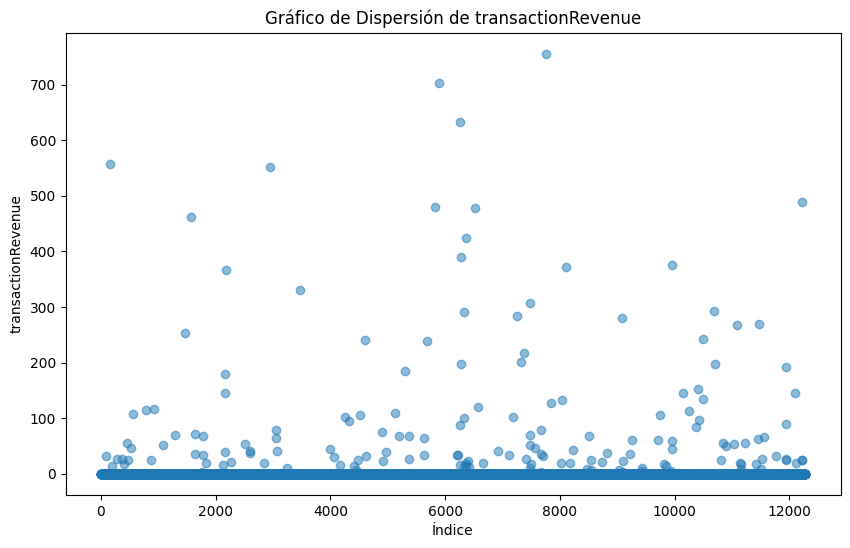

In [ ]:
# Grafico de dispersión (antes)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_traffic['transactionRevenue'])), df_traffic['transactionRevenue'], alpha=0.5)
plt.title('Gráfico de Dispersión de transactionRevenue')
plt.xlabel('Índice')
plt.ylabel('transactionRevenue')
plt.show()

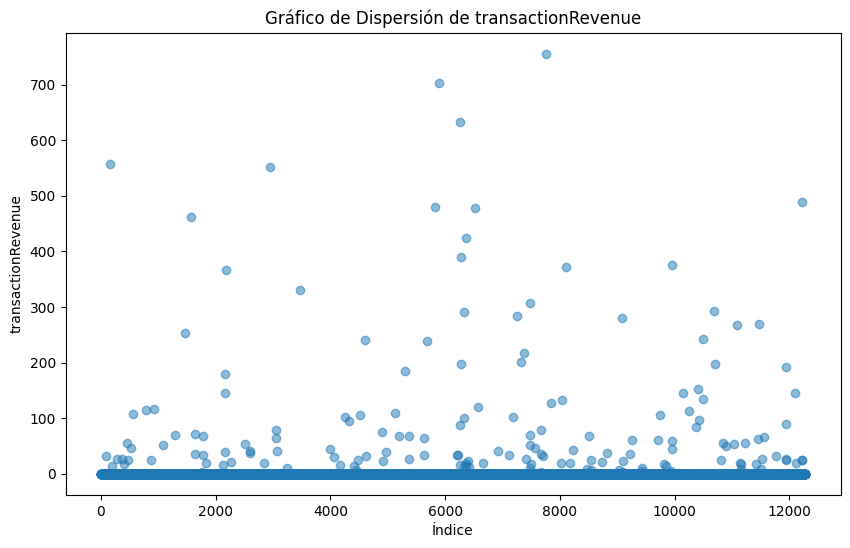

In [ ]:
# Grafico de dispersión (antes)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_traffic['transactionRevenue'])), df_traffic['transactionRevenue'], alpha=0.5)
plt.title('Gráfico de Dispersión de transactionRevenue')
plt.xlabel('Índice')
plt.ylabel('transactionRevenue')
plt.show()

<Axes: ylabel='transactionRevenue'>

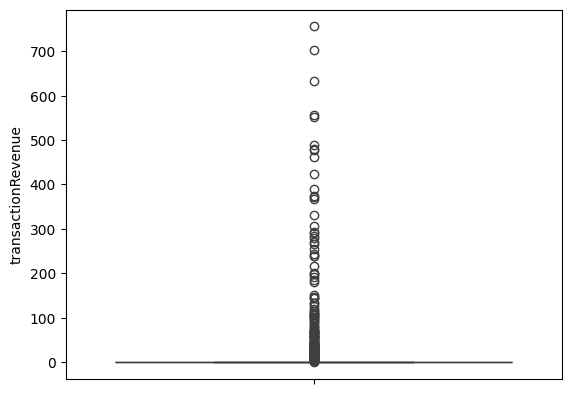

In [ ]:
sns.boxplot(df_traffic.transactionRevenue)

<Axes: ylabel='transactionRevenue'>

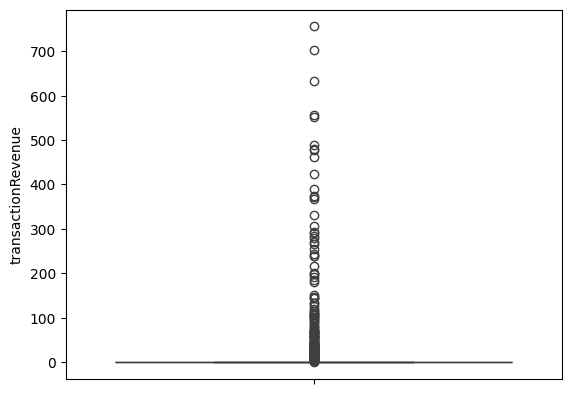

In [ ]:
sns.boxplot(df_traffic.transactionRevenue)

In [ ]:
df_traffic.describe()

,visitNumber,transactionRevenue,hits,bounces,newVisits,pageviews
count,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000
mean,1.923390,1.447871,4.637141,0.502483,0.768949,3.871286
std,5.878228,20.893896,10.136882,0.500014,0.421522,7.273662
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000
75%,1.000000,0.000000,4.000000,1.000000,1.000000,4.000000
max,195.000000,755.630000,471.000000,1.000000,1.000000,305.000000


In [ ]:
df_traffic.describe()

,visitNumber,transactionRevenue,hits,bounces,newVisits,pageviews
count,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000
mean,1.923390,1.447871,4.637141,0.502483,0.768949,3.871286
std,5.878228,20.893896,10.136882,0.500014,0.421522,7.273662
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000
75%,1.000000,0.000000,4.000000,1.000000,1.000000,4.000000
max,195.000000,755.630000,471.000000,1.000000,1.000000,305.000000


In [ ]:
conteo = df_traffic['transactionRevenue'].value_counts().sort_values(ascending=False)
conteo

0.00      12119
33.59         3
19.19         3
13.59         3
4.99          2
          ...  
7.99          1
269.55        1
62.05         1
8.48          1
25.24         1
Name: transactionRevenue, Length: 147, dtype: int64

In [ ]:
conteo = df_traffic['transactionRevenue'].value_counts().sort_values(ascending=False)
conteo

0.00      12119
33.59         3
19.19         3
13.59         3
4.99          2
          ...  
7.99          1
269.55        1
62.05         1
8.48          1
25.24         1
Name: transactionRevenue, Length: 147, dtype: int64

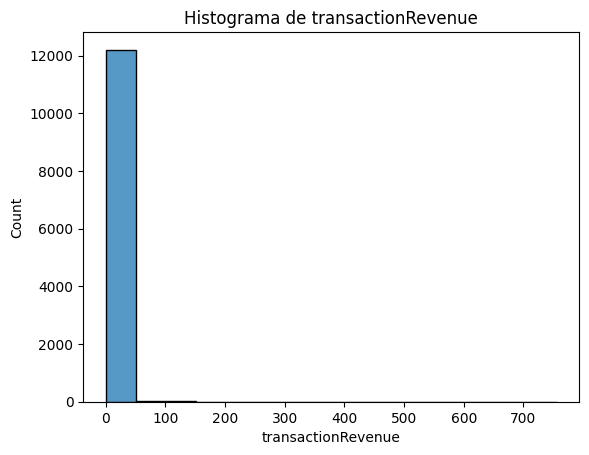

In [ ]:
#Histograma (antes)
ax = sns.histplot(data=df_traffic, x='transactionRevenue', kde=False)
ax.set_title('Histograma de transactionRevenue')
ax.set_xlabel('transactionRevenue');

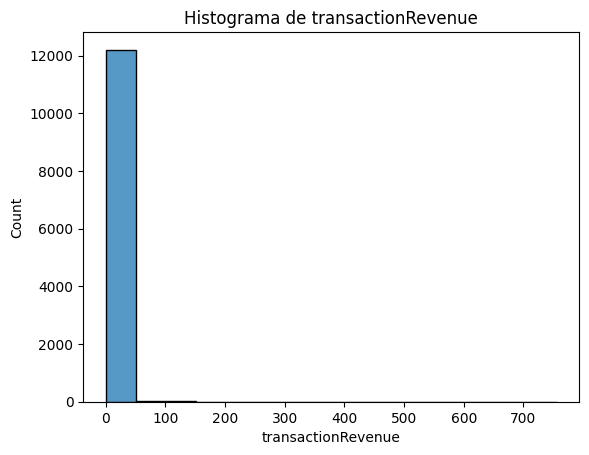

In [ ]:
#Histograma (antes)
ax = sns.histplot(data=df_traffic, x='transactionRevenue', kde=False)
ax.set_title('Histograma de transactionRevenue')
ax.set_xlabel('transactionRevenue');

In [ ]:
def feature_engineering():
  global df_traffic

  # Crear nuevas variables a partir de 'date'
  df_traffic['year'] = df_traffic['date'].apply(lambda x: x.year)
  df_traffic['month'] = df_traffic['date'].apply(lambda x: x.month)
  df_traffic['quarterMonth'] = df_traffic['date'].apply(lambda x: (x.month - 1) // 3 + 1)
  df_traffic['day'] = df_traffic['date'].apply(lambda x: x.day)
  df_traffic['weekday'] = df_traffic['date'].apply(lambda x: x.weekday())

  # Crear variable 'time_range' a partir de 'visitStartTime'
  df_traffic['time_range'] = pd.cut(df_traffic['visitStartTime'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['madrugada', 'mañana', 'tarde', 'noche'], ordered=False).astype('object')

  # Ratio de Conversiones (Conversion Rate)
  df_traffic['conversion_rate'] = df_traffic['transactionRevenue'] / df_traffic['visitNumber']

  # Duración de la Sesión (Session Duration)
  df_traffic['session_duration'] = df_traffic['visitStartTime'].diff().dt.total_seconds()

  # Frecuencia de Visitas (Visit Frequency)
  visit_frequency = df_traffic.groupby('fullVisitorId')['visitNumber'].nunique()
  df_traffic['visit_frequency'] = df_traffic['fullVisitorId'].map(visit_frequency)


  # Interacción del Usuario (User Interaction)
  df_traffic['user_interaction'] = (df_traffic['bounces'] == 0).astype(int)

  # Eliminar atributos que no se utilizarán
  df_traffic.drop(['date', 'fullVisitorId', 'sessionId', 'visitId', 'visitStartTime'], axis=1, inplace=True)

  # Aplicar LabelEncoder a variables categóricas
  cualitativas = df_traffic.dtypes[df_traffic.dtypes == object].keys()
  for columna in cualitativas:
      lbl = LabelEncoder()
      strings = list(df_traffic[columna].values.astype('str'))
      lbl.fit(strings)
      df_traffic[columna] = lbl.transform(strings)

  # Reiniciar el índice
  df_traffic.reset_index(drop=True, inplace=True)


feature_engineering()
df_traffic.sample(5)


,channelGrouping,visitNumber,browser,deviceCategory,isMobile,operatingSystem,metro,city,referralPath,campaign,medium,source,transactionRevenue,hits,bounces,newVisits,pageviews,year,month,quarterMonth,day,weekday,time_range,conversion_rate,session_duration,visit_frequency,user_interaction
2463,3,1,5,0,False,3,45,172,197,0,4,16,0.0,27,0,1,16,2016,11,4,9,2,0,0.0,51291.0,1,1
545,4,1,18,1,True,11,0,197,197,0,5,23,0.0,4,0,1,3,2016,12,4,13,1,4,0.0,886.0,1,1
1655,7,1,5,0,False,9,0,57,124,0,6,75,0.0,2,0,1,2,2017,4,2,12,2,1,0.0,-1985.0,1,1
3333,4,1,5,1,True,1,52,295,197,0,5,23,0.0,1,1,1,1,2016,10,4,15,5,3,0.0,3215.0,1,0
7690,4,1,18,1,True,11,52,295,197,0,5,23,0.0,1,1,1,1,2017,4,2,30,6,4,0.0,4687186.0,1,0


In [ ]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channelGrouping     12283 non-null  int64  
 1   visitNumber         12283 non-null  int64  
 2   browser             12283 non-null  int64  
 3   deviceCategory      12283 non-null  int64  
 4   isMobile            12283 non-null  bool   
 5   operatingSystem     12283 non-null  int64  
 6   metro               12283 non-null  int64  
 7   city                12283 non-null  int64  
 8   referralPath        12283 non-null  int64  
 9   campaign            12283 non-null  int64  
 10  medium              12283 non-null  int64  
 11  source              12283 non-null  int64  
 12  transactionRevenue  12283 non-null  float64
 13  hits                12283 non-null  int64  
 14  bounces             12283 non-null  int64  
 15  newVisits           12283 non-null  int64  
 16  page

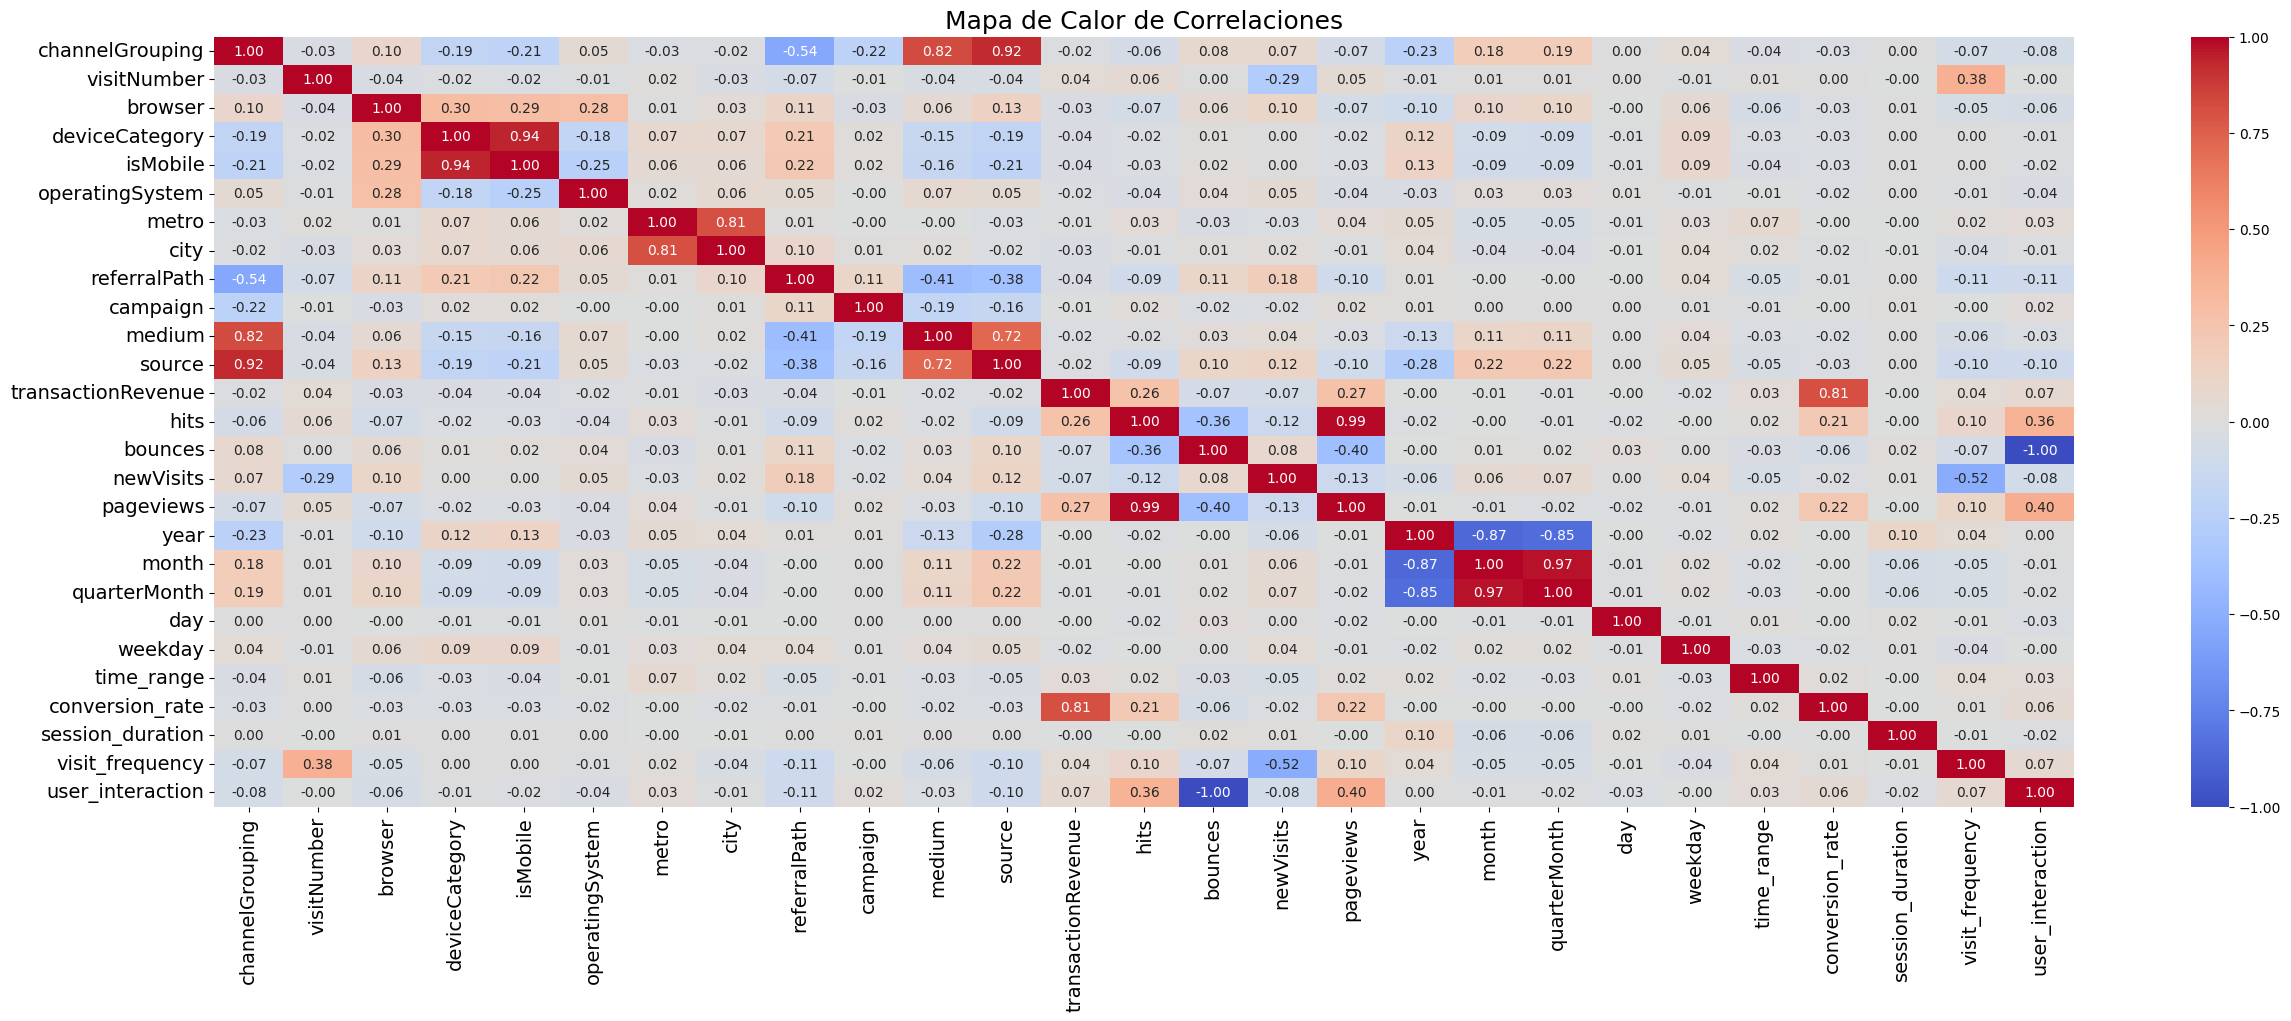

In [ ]:
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_traffic.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

In [ ]:
df_traffic.dropna()

,channelGrouping,visitNumber,browser,deviceCategory,isMobile,operatingSystem,metro,city,referralPath,campaign,medium,source,transactionRevenue,hits,bounces,newVisits,pageviews,year,month,quarterMonth,day,weekday,time_range,conversion_rate,session_duration,visit_frequency,user_interaction
1,4,1,5,0,False,6,52,295,197,0,5,23,0.0,1,1,1,1,2016,9,3,2,4,4,0.0,31321.0,1,0
2,1,1,5,0,False,6,0,43,197,4,2,3,0.0,1,1,1,1,2016,9,3,2,4,3,0.0,20874.0,1,0
3,4,2,18,1,True,11,52,295,197,0,5,23,0.0,1,1,0,1,2016,9,3,2,4,0,0.0,22847.0,3,0
4,4,1,18,1,True,11,52,295,197,0,5,23,0.0,5,0,1,4,2016,9,3,2,4,4,0.0,-49978.0,3,1
5,4,1,5,0,False,9,0,43,197,0,5,23,0.0,7,0,1,5,2016,9,3,2,4,4,0.0,-4447.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,7,1,5,0,False,9,52,295,171,0,6,75,0.0,1,1,1,1,2017,1,1,4,2,4,0.0,-41456.0,1,0
12279,7,1,5,1,True,1,52,295,129,0,6,75,0.0,1,1,1,1,2017,1,1,4,2,0,0.0,39799.0,1,0
12280,7,1,5,0,False,5,52,295,129,0,6,75,0.0,1,1,1,1,2017,1,1,4,2,0,0.0,11715.0,1,0
12281,7,2,5,1,True,1,52,295,165,0,6,75,0.0,2,0,0,2,2017,1,1,4,2,1,0.0,9805.0,6,1


In [ ]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channelGrouping     12283 non-null  int64  
 1   visitNumber         12283 non-null  int64  
 2   browser             12283 non-null  int64  
 3   deviceCategory      12283 non-null  int64  
 4   isMobile            12283 non-null  bool   
 5   operatingSystem     12283 non-null  int64  
 6   metro               12283 non-null  int64  
 7   city                12283 non-null  int64  
 8   referralPath        12283 non-null  int64  
 9   campaign            12283 non-null  int64  
 10  medium              12283 non-null  int64  
 11  source              12283 non-null  int64  
 12  transactionRevenue  12283 non-null  float64
 13  hits                12283 non-null  int64  
 14  bounces             12283 non-null  int64  
 15  newVisits           12283 non-null  int64  
 16  page

#**4. Construcción de Modelos**


---


In [ ]:
df = df_traffic.dropna()

In [ ]:
X = df.drop('transactionRevenue', axis=1)
y = df['transactionRevenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    'LightGBM': lgb.LGBMRegressor(n_estimators=200, learning_rate=0.01),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200),
    'Random Forest': RandomForestRegressor(max_depth=10, n_estimators=200),
    'Support Vector Machine': SVR(kernel='rbf',C=10,epsilon=0.5,gamma='auto'),
    'AdaBoost': AdaBoostRegressor(n_estimators=200, learning_rate=0.01),
    'XGBoost': XGBRegressor(n_estimators=200, learning_rate=0.01)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append({'Modelo': name, 'MSE': mse, 'R^2': r2, 'MAE': mae, 'RMSE': rmse})


results_df = pd.DataFrame(results)
results_df


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 9825, number of used features: 26
[LightGBM] [Info] Start training from score 1.378747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

,Modelo,MSE,R^2,MAE,RMSE
0,LightGBM,133.583717,0.736937,0.876892,11.557842
1,Gradient Boosting,36.819395,0.927492,0.272957,6.067899
2,Random Forest,74.695421,0.852904,0.436727,8.642651
3,Support Vector Machine,509.003941,-0.002370,2.335725,22.561116
4,AdaBoost,102.207371,0.798725,0.815152,10.109766
5,XGBoost,108.585484,0.786165,0.669129,10.420436


#**5. Evaluación y Selección del Modelo**


---


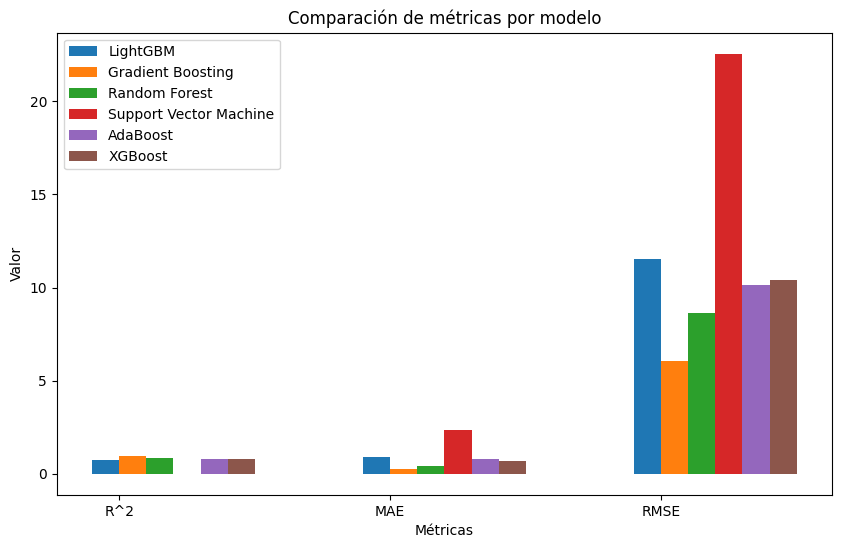

In [ ]:
metricas = [ 'R^2', 'MAE', 'RMSE']
modelos = results_df['Modelo'].unique()

fig, ax = plt.subplots(figsize=(10, 6))
ancho_barra = 0.1
espacio_entre_barras = 0
indice = np.arange(len(metricas))

# Para cada modelo, graficar una barra para cada métrica
for i, modelo in enumerate(modelos):
    valores_metricas = results_df.loc[results_df['Modelo'] == modelo, metricas].values[0]
    ax.bar(indice + (ancho_barra + espacio_entre_barras) * i, valores_metricas, width=ancho_barra, label=modelo)

ax.set_xlabel('Métricas')
ax.set_ylabel('Valor')
ax.set_title('Comparación de métricas por modelo')
ax.set_xticks(indice + ancho_barra / 2)
ax.set_xticklabels(metricas)
ax.legend()

plt.show()

## Optimizar hiperparametros

### **SVM**

In [ ]:
from sklearn.metrics import mean_squared_error, make_scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scorer = make_scorer(rmse, greater_is_better=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, make_scorer

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto']
}

model = SVR(kernel='rbf')
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scorer = make_scorer(rmse, greater_is_better=False)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

best_model = SVR(**best_params)
best_model.fit(X_train, y_train)

Mejores hiperparámetros: {'C': 10, 'epsilon': 0.5, 'gamma': 'auto'}


SVR(C=10, epsilon=0.5, gamma='auto')

#### **Gradient Boosting Regressor**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.5]
}

model_gb = GradientBoostingRegressor()

grid_search_gb = GridSearchCV(estimator=model_gb, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)

best_params_gb = grid_search_gb.best_params_
print("Mejores hiperparámetros para Gradient Boosting:", best_params_gb)

best_model_gb = GradientBoostingRegressor(**best_params_gb)
best_model_gb.fit(X_train, y_train)


Mejores hiperparámetros para Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


GradientBoostingRegressor(n_estimators=200)

### **Gradient Boosting Regressor**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.5]
}

model_gb = GradientBoostingRegressor()

grid_search_gb = GridSearchCV(estimator=model_gb, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)

best_params_gb = grid_search_gb.best_params_
print("Mejores hiperparámetros para Gradient Boosting:", best_params_gb)

best_model_gb = GradientBoostingRegressor(**best_params_gb)
best_model_gb.fit(X_train, y_train)



Mejores hiperparámetros para Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


GradientBoostingRegressor(n_estimators=200)

### **Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

model_rf = RandomForestRegressor()

grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5, scoring=scorer)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
print("Mejores hiperparámetros para Random Forest:", best_params_rf)

best_model_rf = RandomForestRegressor(**best_params_rf)
best_model_rf.fit(X_train, y_train)


Mejores hiperparámetros para Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


RandomForestRegressor(max_depth=10, min_samples_split=5)

In [ ]:
indices_aleatorios = np.random.choice(len(X_test), size=10, replace=False)
X_test_10 = X_test.iloc[indices_aleatorios]
y_test_10 = y_test.iloc[indices_aleatorios]

y_pred = models['Gradient Boosting'].predict(X_test_10)

df_resultados = pd.DataFrame({
    'Real_Y': y_test_10,
    'Y_Estimado': y_pred
})

print(df_resultados)

      Real_Y  Y_Estimado
2056     0.0   -0.002166
4103     0.0   -0.002166
9431     0.0    0.025850
6274     0.0   -0.003630
2334     0.0   -0.002166
7272     0.0   -0.002166
5759     0.0   -0.002166
6437     0.0   -0.002166
2289     0.0   -0.002166
5413     0.0   -0.002166


In [ ]:
indices_aleatorios = np.random.choice(len(X_test), size=10, replace=False)
X_test_10 = X_test.iloc[indices_aleatorios]
y_test_10 = y_test.iloc[indices_aleatorios]

y_pred = models['Gradient Boosting'].predict(X_test_10)

df_resultados = pd.DataFrame({
    'Real_Y': y_test_10,
    'Y_Estimado': y_pred
})

print(df_resultados)

       Real_Y  Y_Estimado
928      0.00   -0.002166
8751     0.00   -0.002166
5641     0.00   -0.002166
104      0.00   -0.002166
3209     0.00   -0.001415
1273     0.00   -0.002166
189      0.00   -0.002166
9752   105.49  115.421350
8467     0.00   -0.002166
12187    0.00   -0.002166


### **Guardar Modelo**

In [ ]:
from joblib import dump
modelo = models['Gradient Boosting']
dump(modelo, 'model.joblib')

['model.joblib']

#**6. Producción**


---


In [ ]:
df_traffic = df_traffic[df.columns]
df_traffic = df_traffic.dropna()
X = df_traffic.drop('transactionRevenue',axis=1)

# X['clasificacion'] = modelo_clasificacion.predict(X)
y = df_traffic.transactionRevenue.copy()
modelo = models['Gradient Boosting']
predictions = modelo.predict(X)
predictions[predictions < 1] = 0

#Genera algunas métricas de evaluación de los pronosticos
r2 = r2_score(y, predictions)*100
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
print(f"R-cuadrado (R²): {r2}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")

R-cuadrado (R²): 98.30703755903846
Error cuadrático medio (MSE): 7.390707277452187
Raíz del error cuadrático medio (RMSE): 2.718585528809456


In [ ]:
#Ejemplos de los pronósticos
df_resultados = pd.DataFrame({
    'transactionRevenue': y,
    'predictions': predictions
})
df_resultados[df_resultados.transactionRevenue>0].sample(10)

,transactionRevenue,predictions
8633,1.99,2.135748
1785,33.59,31.730356
1635,71.85,76.354433
10257,112.05,109.711976
7117,34.38,48.664483
12220,489.20,489.408701
1824,19.99,20.556393
11519,27.19,26.320101
2599,37.80,39.418595
4410,14.48,13.264313


In [ ]:
#Cargar base de prueba y ejecutar normalización utilizada en nuestro modelo
df_traffic = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/traffic_test.csv', dtype={'date':object,'fullVisitorId':object,'visitId':object})
preprocesamiento()
feature_engineering()

#Cargar el modelo entrenado
wget.download('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/modelo.joblib', 'modelo.joblib')
modelo = load('modelo.joblib')
wget.download('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/modelo_clasificacion.joblib', 'modelo_clasificacion.joblib')
modelo_clasificacion = load('modelo_clasificacion.joblib')

#Pronosticar con la nueva base
X = df_traffic.drop('transactionRevenue',axis=1)
X['clasificacion'] = modelo_clasificacion.predict(X)
y = df_traffic.transactionRevenue.copy()
predictions = modelo.predict(xgb.DMatrix(X))
predictions[predictions < 1] = 0

#Genera algunas métricas de evaluación de los pronosticos
r2 = r2_score(y, predictions)*100
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
print(f"R-cuadrado (R²): {r2}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")

NameError: name 'preprocesamiento' is not defined

In [ ]:
#Ejemplos de los pronósticos
df_resultados = pd.DataFrame({
    'transactionRevenue': y,
    'predictions': predictions
})
df_resultados[df_resultados.transactionRevenue>0].sample(10)

,transactionRevenue,predictions
656,192.87,184.523697
657,27.18,131.177628
655,23.97,0.000000
192,269.55,23.365696
276,66.96,3.251449
820,144.97,12.033607
832,19.19,18.876350
939,489.20,376.300415
654,89.99,0.000000
948,23.95,22.540262
